# Adult Income Prediction

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
adult_income = pd.read_csv(r'C:\Users\A\Desktop\adult_income.csv')

In [159]:
adult_income.head(14)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


## Print the name of columns

In [160]:
print(adult_income.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'gender',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


## Print the number of rows and columns

In [161]:
print("Number of rows:", len(adult_income))
print("Number of columns:", len(adult_income.columns))

Number of rows: 8739
Number of columns: 15


## Check And Replace NaN values

In [162]:
adult_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
gender            0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no nan values. "?" can seem like nan values, but to deal with "?", simply extra category can be created so that "?" is treated as 'unknown' category. 

## Ordinal Encoding

For categorical variables where ordinal relationship exists, ordinal encoding is better than one-hot encoding. For example, to 
predict the income range, those who received college education might earn more than those whose highest educational background
is from high school. Therefore, 2 can be assigned to category 'some-colleges', and 1 to category 'HS-grad'. However, variable 
such as marital status are not in ordinal relationship. Since adult income dataset has variables with ordinal relationship, ordinal encoding should be used in data pipeline. 

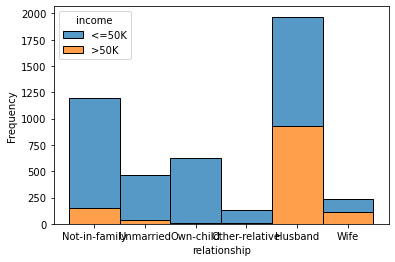

In [163]:
ax = sns.histplot(data=adult_income, x='relationship', hue='income', multiple='stack', stat='frequency', binwidth=2) 

## Feature Engineering

In [164]:
adult_income['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

Because there are unnecessarily too many unique labels in education column, concatenate some labels using label mapping. 

In [166]:
dict = {'7th-8th':'Non-mid','1st-4th':'Non-mid',
        '5th-6th':'Non-mid', '9th': 'Mid-grad','10th':'Mid-grad', '11th': 'Mid-grad', '12th':'Mid-grad', 'HS-grad':'HS-grad', 'Some-college':'College-Grad'
     ,'Doctorate':'Graduate', 'Prof-school':'Prof-school', 'Bachelors':'College-Grad', 'Masters':'Graduate', 'Assoc-acdm':'Assoc-acdm',
       'Assoc-voc':'Assoc-voc', 'Preschool':'Preschool'}
adult_income['education'] = adult_income['education'].map(dict)

In [167]:
adult_income['education'].unique()

array(['HS-grad', 'College-Grad', 'Non-mid', 'Mid-grad', 'Graduate',
       'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Preschool'],
      dtype=object)

## Set up preprocessor

In [168]:
adult_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'gender',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [169]:
adult_income['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [170]:
num_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'fnlwgt']
cat_cols = ['workclass', 'education',
       'marital.status', 'occupation', 'relationship', 'race', 'gender', 'native.country']

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [172]:
num_pipeline = Pipeline(steps=[('scale', MinMaxScaler())])
cat_pipeline = Pipeline(steps=[('odi', (OrdinalEncoder(handle_unknown='error')))])

## Build pipelines & Classifiers

In [173]:
col_trans = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, num_cols), ('cat_pipeline', cat_pipeline, cat_cols)], 
                             remainder='drop', n_jobs=-1)

In [174]:
X = adult_income[num_cols+cat_cols]
le = LabelEncoder()
y = le.fit_transform(adult_income['income'])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config 

lr = LogisticRegression() 
rf = RandomForestClassifier(max_depth=9)
dt = DecisionTreeClassifier(max_depth=8)
lr_pipeline = Pipeline(steps=[('col_trans', col_trans), ('model', lr)]) 
rf_pipeline = Pipeline(steps=[('col_trans', col_trans), ('model', rf)]) 
dt_pipeline = Pipeline(steps=[('col_trans', col_trans), ('model', dt)]) 

## Fit Models

In [177]:
lr_pipeline.fit(X_train, y_train)

C:\Users\A\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week',
                                                   'fnlwgt']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('odi',
                                                                   OrdinalEncoder())]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native.country'])])),
                ('model', LogisticRegression())])

In [178]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week',
                                                   'fnlwgt']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('odi',
                                                                   OrdinalEncoder())]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native.country'])])),
                ('model', RandomForestClassifier(max_depth=9))])

In [179]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week',
                                                   'fnlwgt']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('odi',
                                                                   OrdinalEncoder())]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native.country'])])),
                ('model', DecisionTreeClassifier(max_depth=8))])

# Evaluate Models

In [180]:
print('Accuracy of Logistic Regression:', lr_pipeline.score(X_test, y_test)) 

Accuracy of Logistic Regression: 0.7913806254767353


In [181]:
print('Accuracy of Random Forest:', rf_pipeline.score(X_test, y_test)) 

Accuracy of Random Forest: 0.8790999237223494


In [182]:
print('Accuracy of Decision Tree:', dt_pipeline.score(X_test, y_test)) 

Accuracy of Decision Tree: 0.879862700228833


# Conclusions

In [183]:
adult_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,8739.000000,8.739000e+03,8739.000000,8739.000000,8739.000000,8739.000000
mean,40.507495,1.888724e+05,10.464584,4015.256208,325.288935,41.634283
std,13.616734,1.040999e+05,2.634824,13836.282455,726.384743,12.213356
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,30.000000,1.177490e+05,9.000000,0.000000,0.000000,40.000000
50%,39.000000,1.772260e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.382960e+05,13.000000,3103.000000,0.000000,48.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,4356.000000,99.000000


Feature distributions are largely different, especially distribution of capital gain and capital loss from that of others becauses standard deviation is larger than mean for capital gain and capital loss, while it's opposite for other features. Because tree classifiers are generally less reliant on feature distributions, the accuracy of decision tree were higher than that of logistic regression and random forest. Random forest, ensemble of decision trees, didn't necessarily perform better than decision tree because overfitting problem might not have occured with only 15 columns for over 8000 data.   